In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions
from itertools import islice
import matplotlib.pyplot as plt

In [48]:
url_20 = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-01.csv.gz"
url_21 = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-01.csv.gz"
df_20 = pd.read_csv(url_20, sep=';', low_memory=False)
df_21 = pd.read_csv(url_21, sep=';', low_memory=False)

In [3]:
pd.set_option('display.max_columns()', None)

In [4]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [5]:
df_20.head(2)

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.932058,6.988541,50.936326,6.986125,2020-01-01 02:40:01,2020-01-01 02:46:02,6.0,504.0,26503191,26523894,160.0,NaN,BIKE 22739,2620
1,50.936326,6.986125,50.932037,6.988254,2020-01-01 06:25:02,2020-01-01 06:30:03,5.0,500.0,26523894,26528020,219.0,NaN,BIKE 22739,2613


In [6]:
df_21.head(2)

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.943332,6.981505,50.943501,6.981660,2021-01-02 23:57:02,2021-01-03 00:01:01,4.0,22.0,40297977,40645704,2877.0,NaN,BIKE 21596,814
1,50.943417,6.981606,50.943419,6.981562,2021-01-11 17:52:01,2021-01-11 17:57:02,5.0,3.0,40668729,40822810,9094.0,NaN,BIKE 21596,766


## Quantitative analysis

In [7]:
df_20.describe()

,lat_begin,lng_begin,lat_end,lng_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,available_bikes
count,63109.000000,63109.000000,63109.000000,63109.000000,63109.000000,63109.000000,6.310900e+04,6.310900e+04,63109.000000,63109.000000
mean,50.941050,6.949900,50.941057,6.949829,39.760098,1454.624348,2.700932e+07,2.702753e+07,472.943796,2566.345894
std,0.019488,0.033459,0.019525,0.033464,110.039654,1298.339769,5.365775e+05,3.567388e+05,1200.258974,43.303092
min,50.732188,6.687291,50.733456,6.687291,1.000000,0.000000,3.600450e+05,3.600450e+05,0.000000,2438.000000
25%,50.927361,6.925127,50.927368,6.925101,8.000000,519.000000,2.677053e+07,2.678903e+07,25.000000,2534.000000
50%,50.938959,6.947105,50.939000,6.947024,15.000000,1099.000000,2.702618e+07,2.704044e+07,111.000000,2570.000000
75%,50.954144,6.970742,50.954144,6.970649,28.000000,2074.000000,2.727220e+07,2.728021e+07,452.000000,2604.000000
max,51.028600,7.197774,51.028600,7.101521,1440.000000,19481.000000,2.745502e+07,2.745523e+07,33270.000000,2673.000000


In [8]:
df_21.describe()

,lat_begin,lng_begin,lat_end,lng_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,available_bikes
count,28984.000000,28984.000000,28984.000000,28984.000000,28984.000000,28984.000000,2.898400e+04,2.898400e+04,28984.000000,28984.000000
mean,50.940539,6.947482,50.940585,6.947558,45.231059,1592.743997,4.090900e+07,4.092418e+07,965.765802,764.446729
std,0.020080,0.032865,0.020214,0.032913,116.965306,1456.323232,6.321846e+05,6.762612e+05,2190.856136,23.750070
min,50.812437,6.797032,50.812437,6.797032,1.000000,0.000000,3.922380e+05,3.678240e+05,0.000000,673.000000
25%,50.926160,6.922787,50.926135,6.922847,9.000000,494.000000,4.075943e+07,4.077593e+07,45.000000,749.000000
50%,50.938646,6.944674,50.938714,6.944823,17.000000,1210.000000,4.091314e+07,4.092870e+07,260.000000,765.000000
75%,50.954536,6.966476,50.954706,6.966668,32.000000,2349.000000,4.107850e+07,4.108727e+07,1026.000000,779.000000
max,51.079262,7.118853,51.079262,7.118863,1440.000000,19576.000000,4.126349e+07,4.126400e+07,44149.000000,833.000000


In [9]:
df_20 = df_20[df_20.ride_time != 1]
df_21 = df_21[df_21.ride_time != 1]

In [10]:
df_20.describe()

,lat_begin,lng_begin,lat_end,lng_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,available_bikes
count,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,5.797100e+04,5.797100e+04,57971.000000,57971.000000
mean,50.941077,6.949943,50.941090,6.949874,43.195425,1569.923634,2.700936e+07,2.702683e+07,508.844940,2566.401856
std,0.019440,0.033468,0.019484,0.033510,114.179635,1282.242537,4.749857e+05,3.345751e+05,1235.606503,43.291137
min,50.732188,6.833255,50.733653,6.687291,2.000000,0.000000,3.600450e+05,3.786530e+05,0.000000,2438.000000
25%,50.927344,6.925058,50.927358,6.925052,10.000000,645.000000,2.676803e+07,2.677808e+07,39.000000,2534.000000
50%,50.938976,6.947061,50.939018,6.946996,17.000000,1216.000000,2.702372e+07,2.703772e+07,134.000000,2571.000000
75%,50.954221,6.971123,50.954230,6.971088,30.000000,2190.500000,2.727124e+07,2.727975e+07,502.000000,2604.000000
max,51.028600,7.197774,51.028600,7.101521,1440.000000,19481.000000,2.745492e+07,2.745523e+07,33270.000000,2673.000000


In [11]:
df_21.describe()

,lat_begin,lng_begin,lat_end,lng_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,available_bikes
count,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,2.636000e+04,2.636000e+04,26360.000000,26360.000000
mean,50.940406,6.947582,50.940451,6.947679,49.634029,1728.519651,4.090877e+07,4.092675e+07,1036.417451,764.878452
std,0.020137,0.032433,0.020289,0.032493,121.772954,1451.058051,5.054280e+05,5.271694e+05,2240.484383,23.578364
min,50.812437,6.814314,50.812437,6.814314,2.000000,0.000000,3.922380e+05,3.678240e+05,0.000000,675.000000
25%,50.926012,6.922878,50.925954,6.922926,11.000000,649.000000,4.075657e+07,4.077439e+07,76.000000,749.000000
50%,50.938535,6.944728,50.938607,6.944946,19.000000,1366.000000,4.090990e+07,4.092682e+07,328.000000,766.000000
75%,50.954440,6.966277,50.954631,6.966531,34.000000,2474.000000,4.107117e+07,4.108476e+07,1099.000000,780.000000
max,51.079262,7.118853,51.079262,7.118863,1440.000000,19576.000000,4.126349e+07,4.126400e+07,44149.000000,833.000000


### Visual analysis

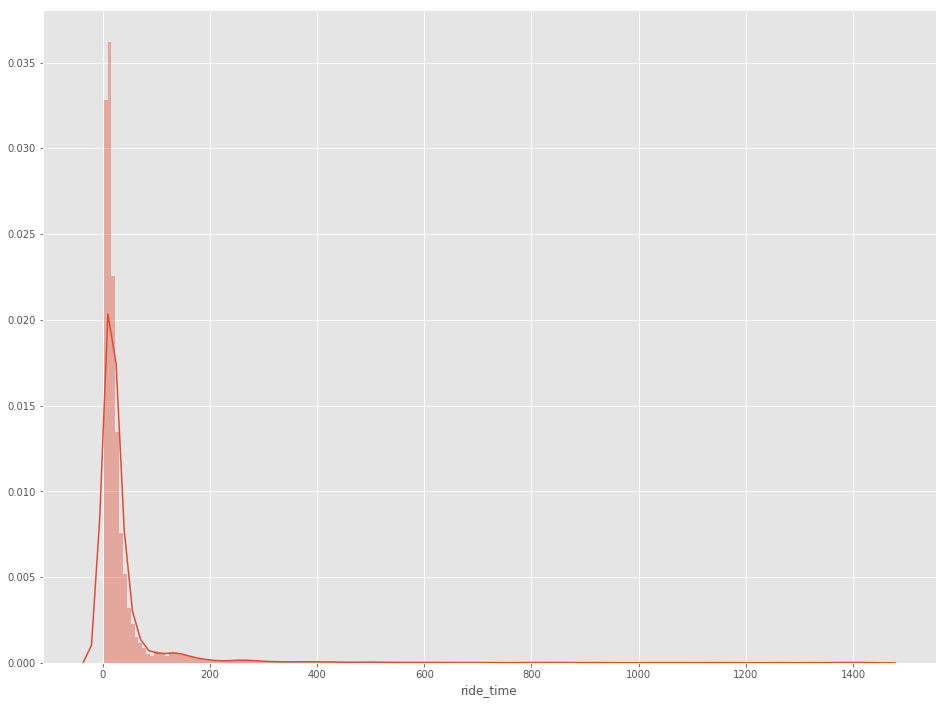

In [12]:
#sns.set_style('white')
#sns.set_context('paper', font_scale= 1.5)

sns.distplot(df_20['ride_time'], bins = 200)

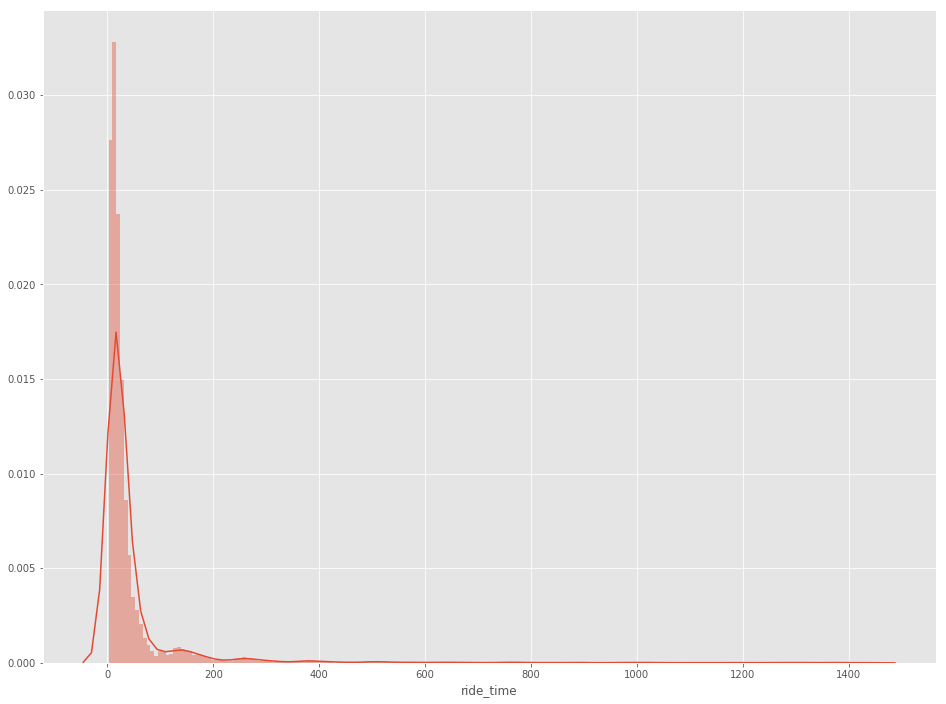

In [13]:
sns.distplot(df_21['ride_time'], bins = 200)

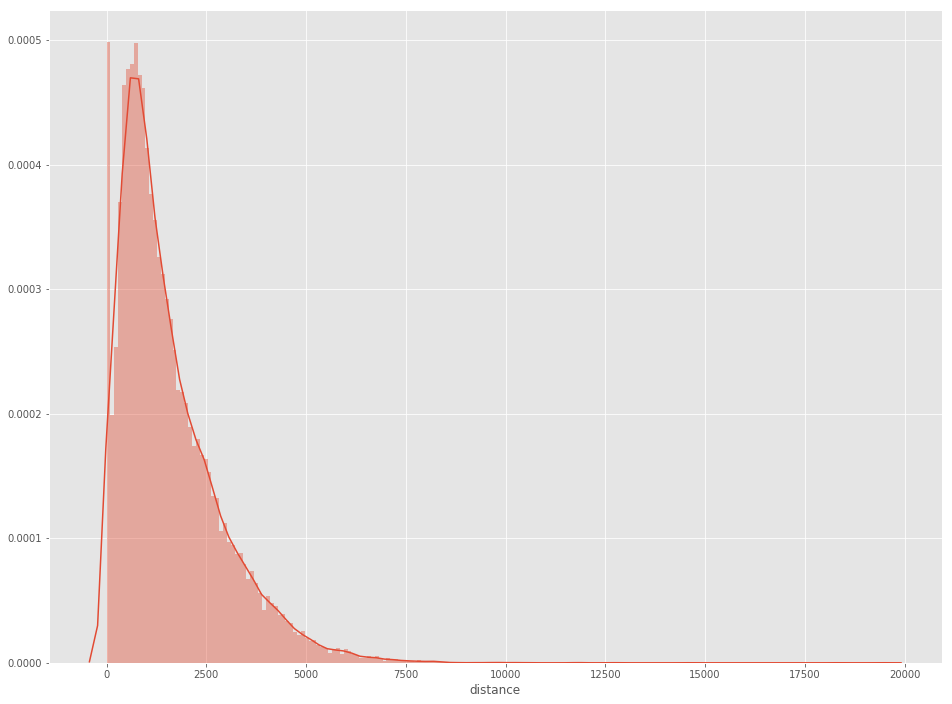

In [14]:
sns.distplot(df_20['distance'], bins = 200)

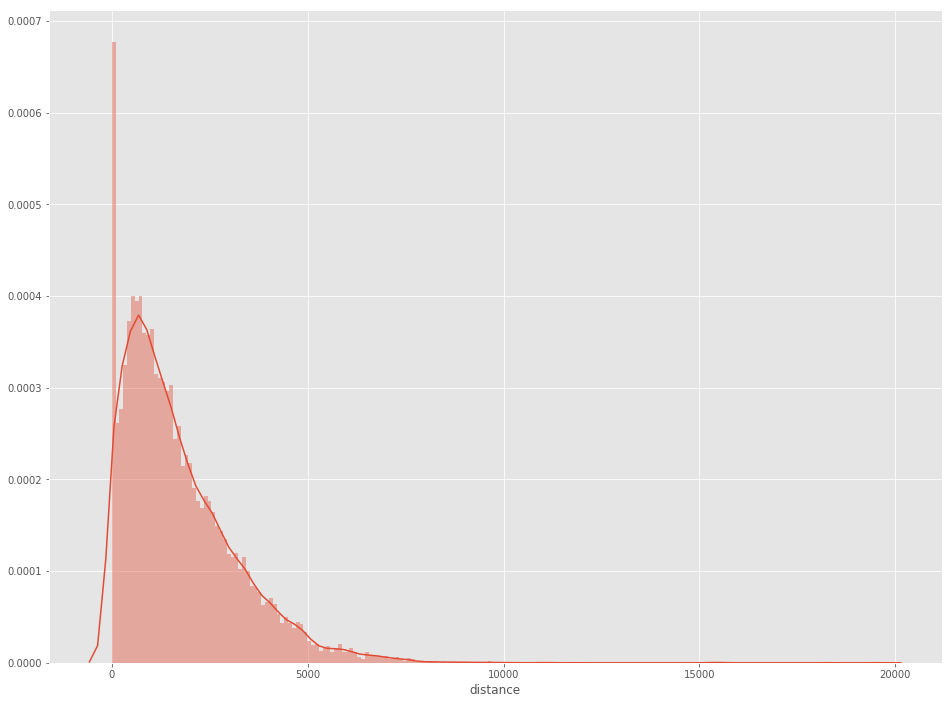

In [15]:
sns.distplot(df_21['distance'], bins = 200)

In [16]:
distances_per_ride_time_20= df_20.groupby('ride_time')['distance'].apply(list)
distances_per_ride_time_21= df_21.groupby('ride_time')['distance'].apply(list) 

In [17]:
distances_per_ride_time_20 = distances_per_ride_time_20.to_dict()
distances_per_ride_time_21 = distances_per_ride_time_21.to_dict()

In [34]:
duration_per_ride_time_20 = {}
for x in distances_per_ride_time_20.keys(): duration_per_ride_time_20[x] = sum(distances_per_ride_time_20[x])

In [40]:
duration_per_ride_time_21 = {}
for x in distances_per_ride_time_21.keys(): duration_per_ride_time_21[x] = sum(distances_per_ride_time_21[x])

<BarContainer object of 961 artists>

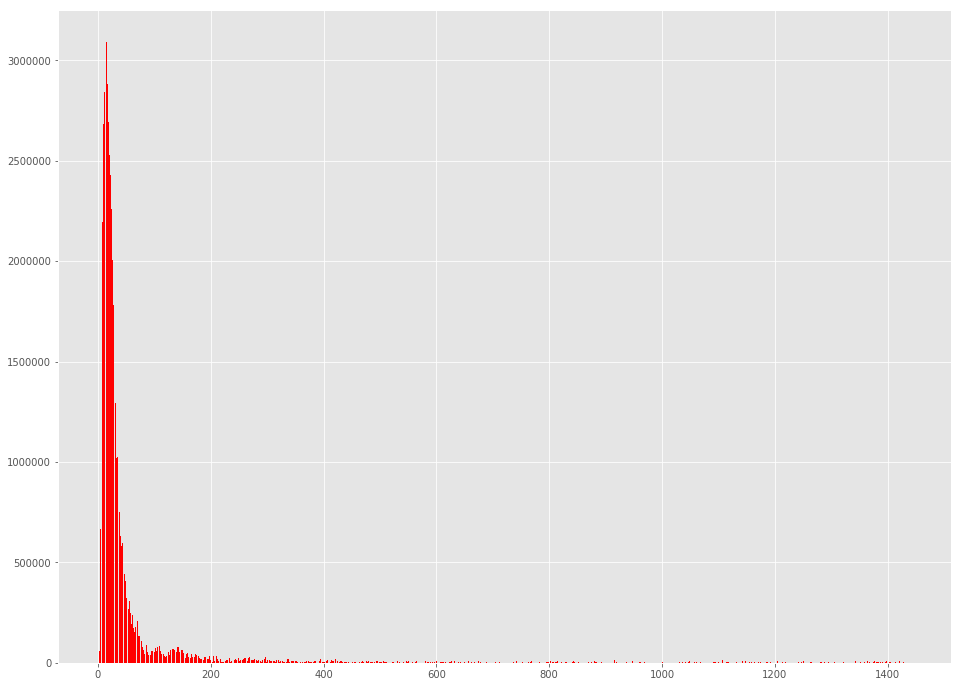

In [39]:
plt.bar(duration_per_ride_time_20.keys(), duration_per_ride_time_20.values(), color='r')

<BarContainer object of 752 artists>

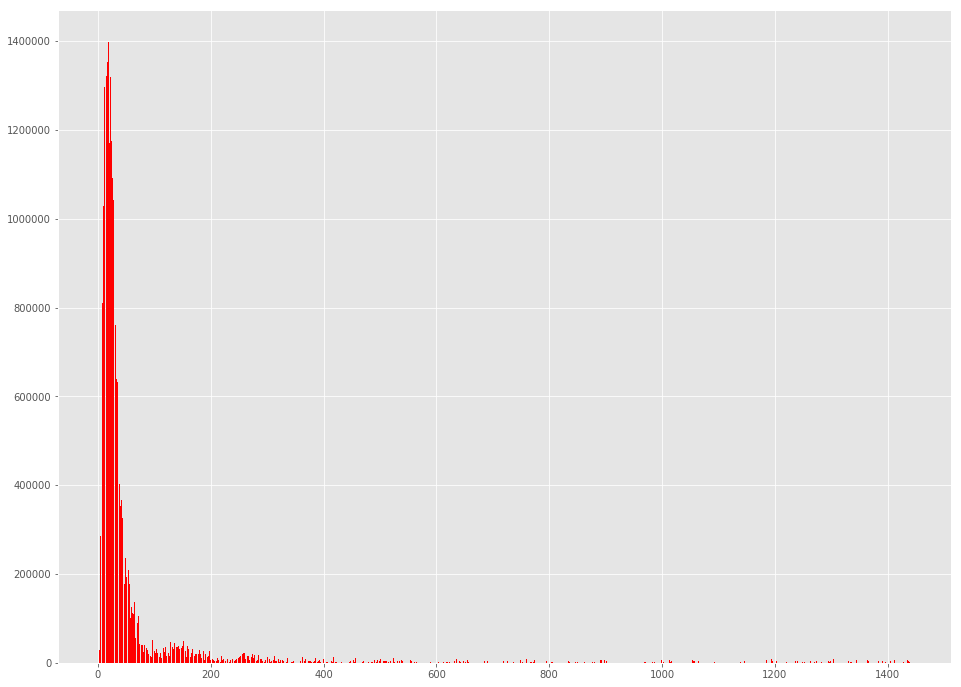

In [41]:
plt.bar(duration_per_ride_time_21.keys(), duration_per_ride_time_21.values(), color='r')

In [43]:
count_per_ride_time_20 = {}
for x in distances_per_ride_time_20.keys(): count_per_ride_time_20[x] = len(distances_per_ride_time_20[x])

In [44]:
count_per_ride_time_21 = {}
for x in distances_per_ride_time_21.keys(): count_per_ride_time_21[x] = len(distances_per_ride_time_21[x])

<BarContainer object of 961 artists>

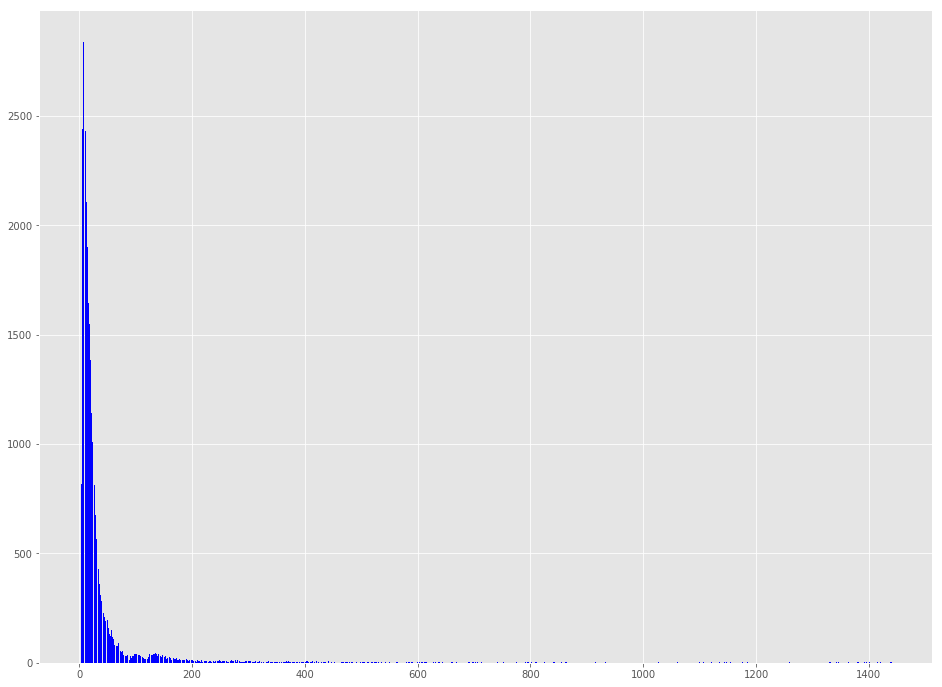

In [45]:
plt.bar(count_per_ride_time_20.keys(), count_per_ride_time_20.values(), color='b')

<BarContainer object of 752 artists>

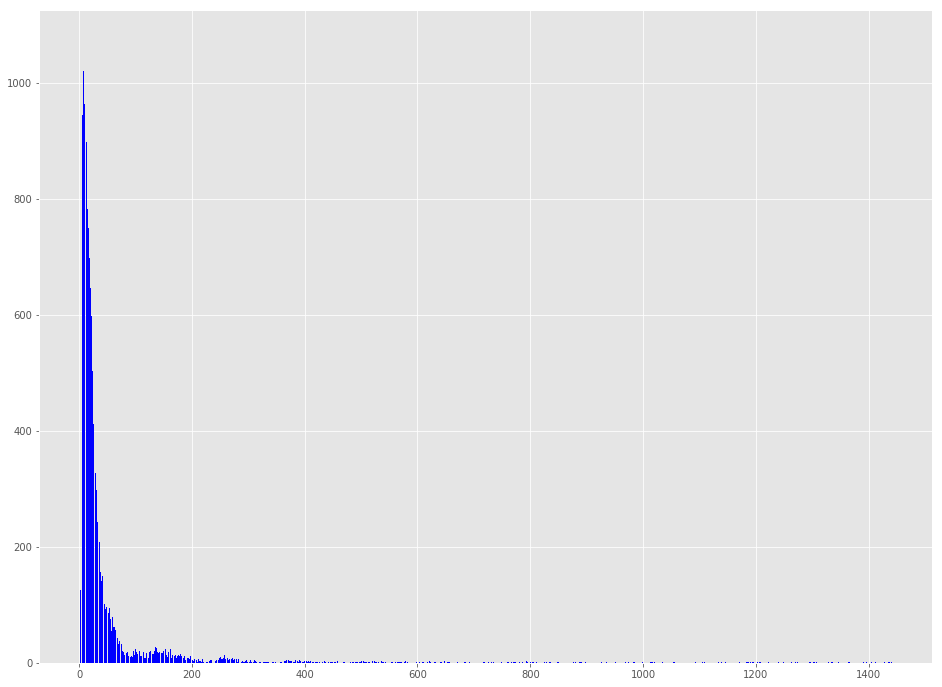

In [46]:
plt.bar(count_per_ride_time_21.keys(), count_per_ride_time_21.values(), color='b')